In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as d
import numpy as np

In [4]:
s = d.datetime(2020, 1, 1)  # Corrected datetime object
e = d.datetime(2025, 2, 23)  # Corrected datetime object

TCS = yf.download('TCS.NS', start=s, end=e)
Infosys = yf.download('INFY.NS', start=s, end=e)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
TCS.columns = TCS.columns.get_level_values(0)
Infosys.columns = Infosys.columns.get_level_values(0)

In [6]:
TCS['Symbol']='TCS'
TCS = TCS.reset_index()
Infosys['Symbol']='Infosys'
Infosys = Infosys.reset_index()

In [7]:
#Close Price × Volume (Total Traded Value)
TCS['Revenue'] = TCS['Close'] * TCS['Volume']

Infosys['Revenue'] = Infosys['Close'] * Infosys['Volume']

In [8]:
TCS['daily_return'] = (TCS.Close - TCS.Open)/TCS.Open * 100
TCS['Price_change'] = TCS.High - TCS.Low
TCS['Volatility'] = (TCS.High - TCS.Low) / TCS.Close*100
TCS['Average_price'] = (TCS.Open + TCS.Close)/2
TCS["Net_Profit"] = TCS["Revenue"] * 0.20 
TCS["Operating_Margin"] = (TCS["Net_Profit"] / TCS["Revenue"]) * 100

In [9]:
Infosys['daily_return'] = (Infosys.Close - Infosys.Open)/Infosys.Open * 100
Infosys['Price_change'] = Infosys.High - Infosys.Low
Infosys['Volatility'] = (Infosys.High - Infosys.Low) /  Infosys.Close*100
Infosys['Average_price'] = (Infosys.Open + Infosys.Close)/2
Infosys["Net_Profit"] = Infosys["Revenue"] * 0.20 
Infosys["Operating_Margin"] = (Infosys["Net_Profit"] / Infosys["Revenue"]) * 100

In [10]:
TCS

Price,Date,Close,High,Low,Open,Volume,Symbol,Revenue,daily_return,Price_change,Volatility,Average_price,Net_Profit,Operating_Margin
0,2020-01-01,1983.747314,1998.664593,1971.300758,1984.113298,1354908,TCS,2.687795e+09,-0.018446,27.363835,1.379401,1983.930306,5.375590e+08,20.0
1,2020-01-02,1974.641479,1995.050074,1966.908240,1995.050074,2380752,TCS,4.701132e+09,-1.022962,28.141834,1.425162,1984.845777,9.402263e+08,20.0
2,2020-01-03,2013.994507,2034.448907,1980.453187,1980.453187,4655761,TCS,9.376677e+09,1.693618,53.995720,2.681026,1997.223847,1.875335e+09,20.0
3,2020-01-06,2013.810913,2037.148039,2002.325342,2017.975033,3023209,TCS,6.088171e+09,-0.206351,34.822698,1.729194,2015.892973,1.217634e+09,20.0
4,2020-01-07,2018.753906,2026.807328,1998.574102,2013.857594,2429317,TCS,4.904193e+09,0.243131,28.233225,1.398547,2016.305750,9.808386e+08,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2025-02-17,3904.500000,3934.000000,3856.199951,3856.500000,1799806,TCS,7.027343e+09,1.244652,77.800049,1.992574,3880.500000,1.405469e+09,20.0
1273,2025-02-18,3873.199951,3924.399902,3864.500000,3898.399902,2149879,TCS,8.326911e+09,-0.646418,59.899902,1.546522,3885.799927,1.665382e+09,20.0
1274,2025-02-19,3784.100098,3874.949951,3768.149902,3872.199951,4366672,TCS,1.652392e+10,-2.275189,106.800049,2.822337,3828.150024,3.304785e+09,20.0
1275,2025-02-20,3779.399902,3788.000000,3751.300049,3761.500000,2888572,TCS,1.091707e+10,0.475871,36.699951,0.971052,3770.449951,2.183414e+09,20.0


In [11]:
Infosys

Price,Date,Close,High,Low,Open,Volume,Symbol,Revenue,daily_return,Price_change,Volatility,Average_price,Net_Profit,Operating_Margin
0,2020-01-01,655.615356,658.418104,651.789424,653.969333,2112415,Infosys,1.384932e+09,0.251697,6.628680,1.011062,654.792345,2.769863e+08,20.0
1,2020-01-02,653.702271,659.129748,650.321216,657.439248,5658200,Infosys,3.698778e+09,-0.568414,8.808532,1.347484,655.570759,7.397556e+08,20.0
2,2020-01-03,663.756592,665.536100,652.990588,652.990588,7882938,Infosys,5.232352e+09,1.648723,12.545512,1.890077,658.373590,1.046470e+09,20.0
3,2020-01-06,657.394897,670.696734,655.303997,663.845616,6519403,Infosys,4.285822e+09,-0.971720,15.392737,2.341475,660.620257,8.571645e+08,20.0
4,2020-01-07,647.652161,660.731505,645.160805,656.638657,7899363,Infosys,5.116040e+09,-1.368560,15.570700,2.404176,652.145409,1.023208e+09,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2025-02-17,1842.300049,1852.750000,1822.150024,1838.550049,4428956,Infosys,8.159466e+09,0.203965,30.599976,1.660966,1840.425049,1.631893e+09,20.0
1273,2025-02-18,1851.949951,1861.650024,1837.599976,1842.300049,4365260,Infosys,8.084243e+09,0.523796,24.050049,1.298634,1847.125000,1.616849e+09,20.0
1274,2025-02-19,1810.800049,1849.199951,1805.900024,1847.400024,4611411,Infosys,8.350343e+09,-1.981161,43.299927,2.391204,1829.100037,1.670069e+09,20.0
1275,2025-02-20,1825.150024,1831.000000,1805.550049,1805.550049,2218020,Infosys,4.048219e+09,1.085540,25.449951,1.394403,1815.350037,8.096439e+08,20.0


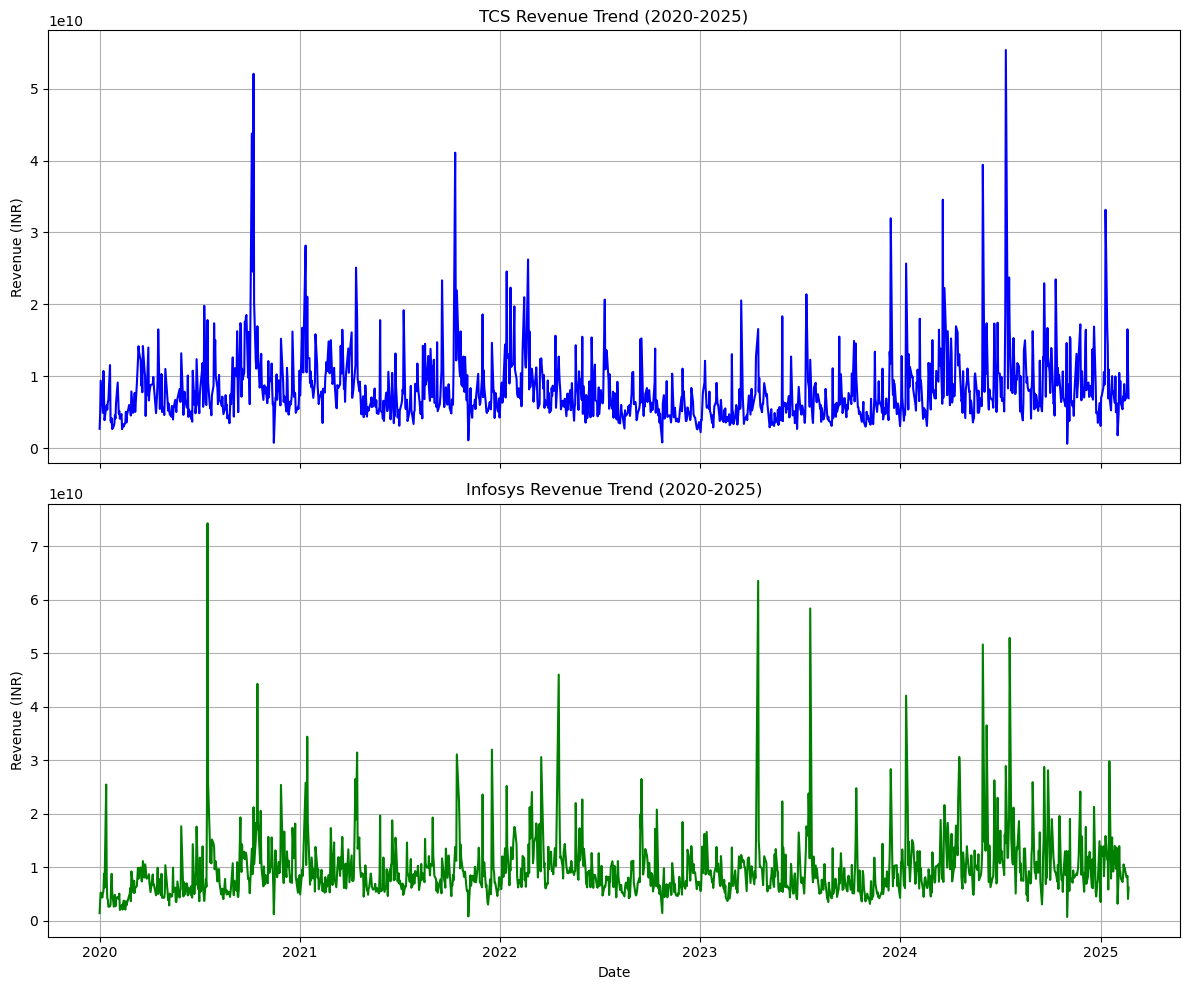

In [29]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# TCS Revenue Plot
ax[0].plot(TCS["Date"], TCS["Revenue"], color="blue")
ax[0].set_title("TCS Revenue Trend (2020-2025)")
ax[0].set_ylabel("Revenue (INR)")
ax[0].grid()

# Infosys Revenue Plot
ax[1].plot(Infosys["Date"], Infosys["Revenue"], color="green")
ax[1].set_title("Infosys Revenue Trend (2020-2025)")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Revenue (INR)")
ax[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()

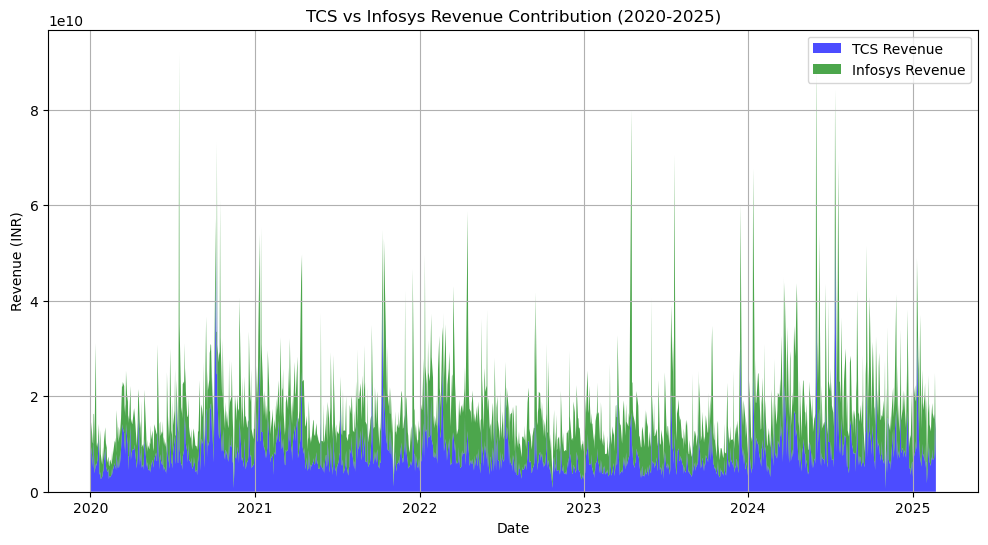

In [31]:
# Merge datasets on Date for stacked area chart
merged_df = pd.merge(TCS[["Date", "Revenue"]], Infosys[["Date", "Revenue"]], on="Date", suffixes=("_TCS", "_Infosys"))

# Create stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(merged_df["Date"], merged_df["Revenue_TCS"], merged_df["Revenue_Infosys"], 
              labels=["TCS Revenue", "Infosys Revenue"], colors=["blue", "green"], alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Revenue (INR)")
plt.title("TCS vs Infosys Revenue Contribution (2020-2025)")
plt.legend()
plt.grid()
plt.show()

In [39]:
TCS["Price_Change"] = TCS["Close"] - TCS["Open"]
Infosys["Price_Change"] = Infosys["Close"] - Infosys["Open"]

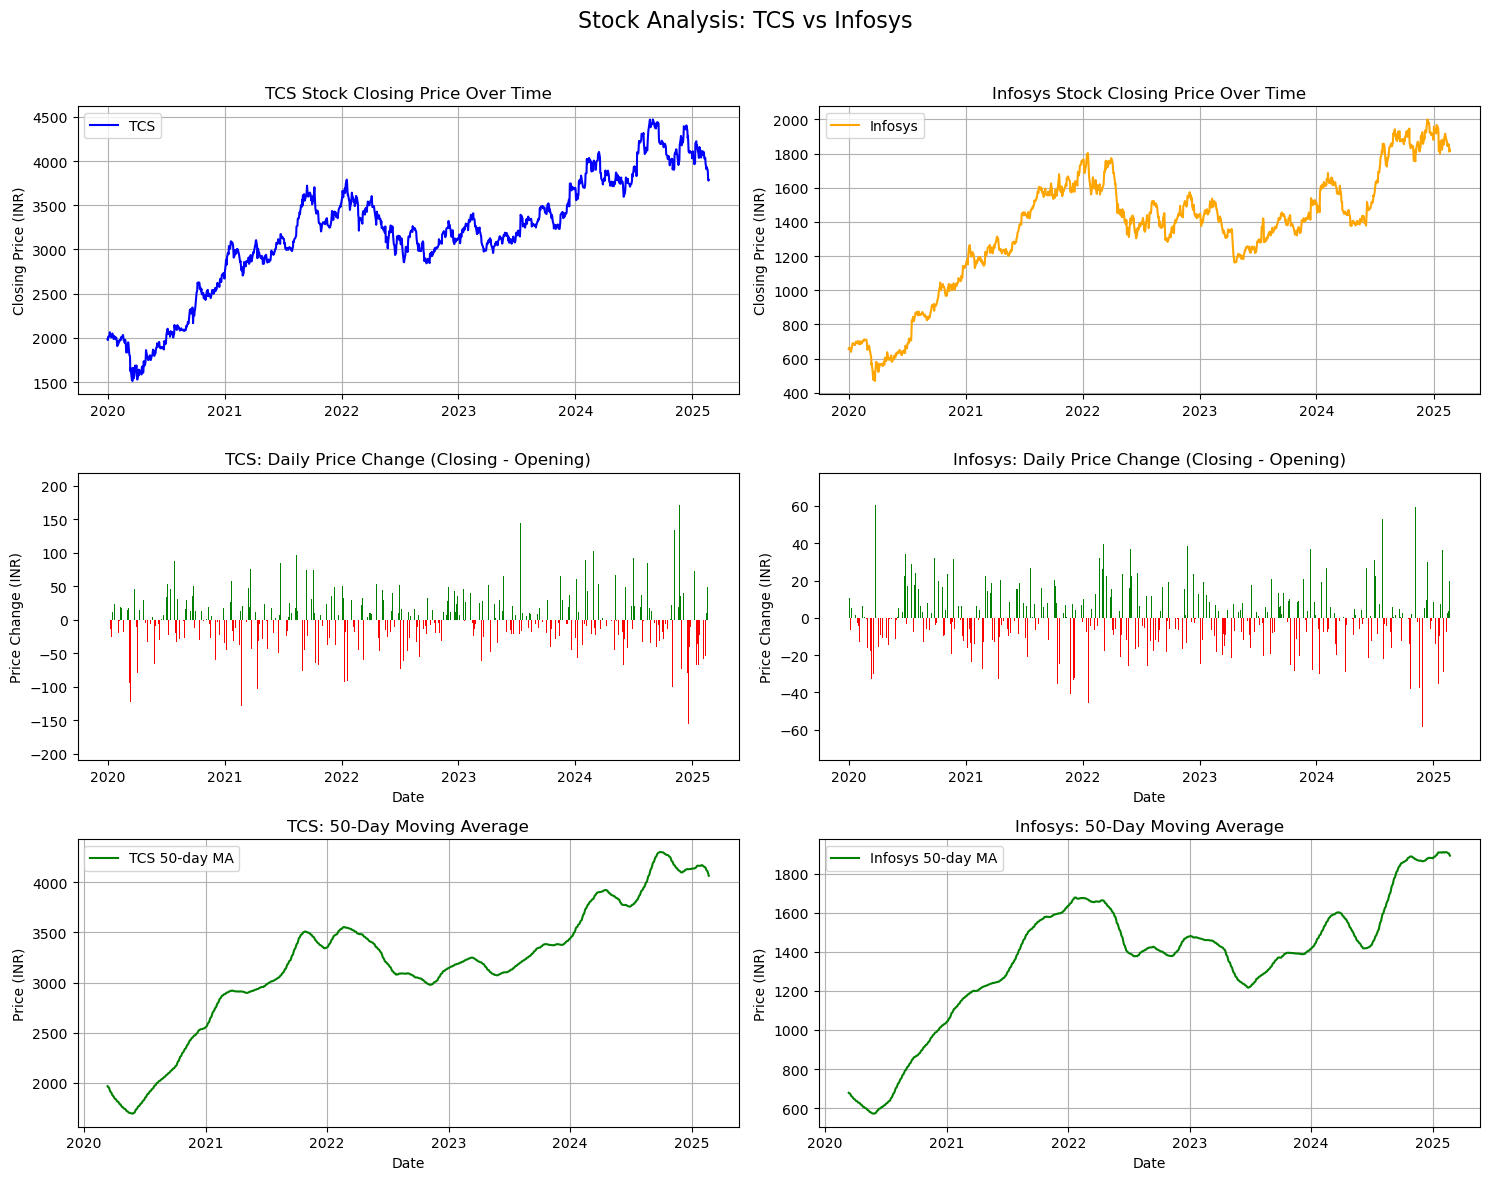

In [40]:
# Calculate moving average for Infosys
Infosys['MA50'] = Infosys['Close'].rolling(window=50).mean()

# Create the subplot layout
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Stock Analysis: TCS vs Infosys", fontsize=16)

# 1. TCS Closing Price (Line Plot)
axes[0, 0].plot(TCS["Date"], TCS["Close"], color='blue', label='TCS')
axes[0, 0].set_title("TCS Stock Closing Price Over Time")
axes[0, 0].set_ylabel("Closing Price (INR)")
axes[0, 0].legend()
axes[0, 0].grid(True)

# 2. Infosys Closing Price (Line Plot)
axes[0, 1].plot(Infosys["Date"], Infosys["Close"], color='orange', label='Infosys')
axes[0, 1].set_title("Infosys Stock Closing Price Over Time")
axes[0, 1].set_ylabel("Closing Price (INR)")
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- 3. TCS: Price Change (Closing - Opening) as Bar Chart ---
colors = np.where(TCS["Price_Change"] > 0, "green", "red")
axes[1, 0].bar(TCS["Date"], TCS["Price_Change"], color=colors)
axes[1, 0].set_title("TCS: Daily Price Change (Closing - Opening)")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Price Change (INR)")

# --- 4. Infosys: Price Change (Closing - Opening) as Bar Chart ---
colors = np.where(Infosys["Price_Change"] > 0, "green", "red")
axes[1, 1].bar(Infosys["Date"], Infosys["Price_Change"], color=colors)
axes[1, 1].set_title("Infosys: Daily Price Change (Closing - Opening)")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Price Change (INR)")

# 5. TCS Placeholder (optional or add another analysis)

axes[2, 0].plot(TCS["Date"], TCS["MA50"], label="TCS 50-day MA", color='green')
axes[2, 0].set_title("TCS: 50-Day Moving Average")
axes[2, 0].set_xlabel("Date")
axes[2, 0].set_ylabel("Price (INR)")
axes[2, 0].legend()
axes[2, 0].grid(True)


# 6. Infosys 50-Day Moving Average
axes[2, 1].plot(Infosys["Date"], Infosys["MA50"], label="Infosys 50-day MA", color='green')
axes[2, 1].set_title("Infosys: 50-Day Moving Average")
axes[2, 1].set_xlabel("Date")
axes[2, 1].set_ylabel("Price (INR)")
axes[2, 1].legend()
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

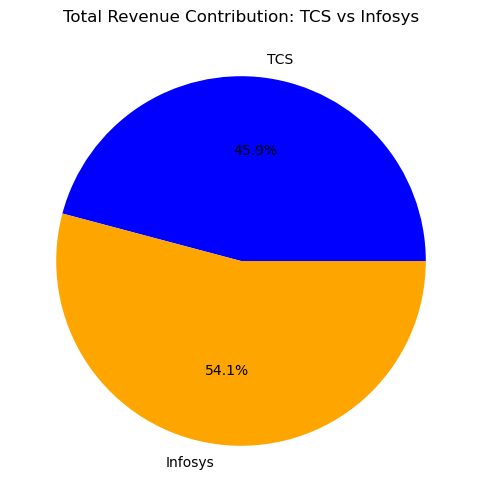

In [41]:
revenue_values = [TCS["Revenue"].sum(), Infosys["Revenue"].sum()]
labels = ["TCS", "Infosys"]

plt.figure(figsize=(6,6))
plt.pie(revenue_values, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title("Total Revenue Contribution: TCS vs Infosys")
plt.show()

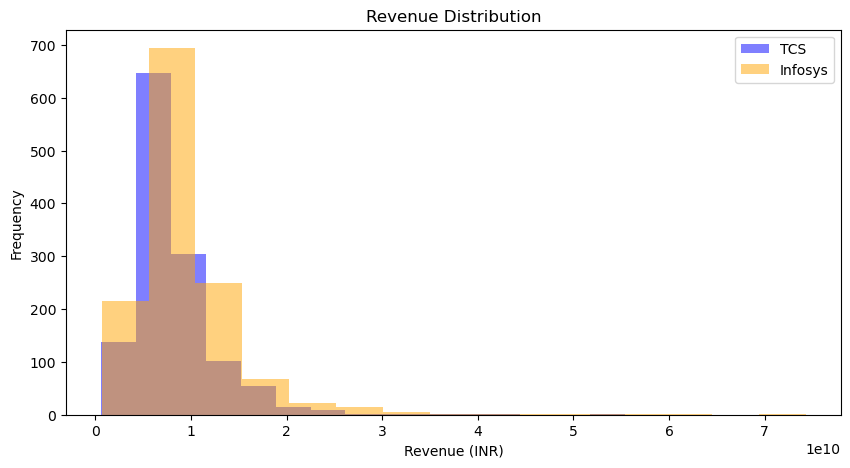

In [42]:
plt.figure(figsize=(10,5))
plt.hist(TCS["Revenue"], bins=15, alpha=0.5, label="TCS", color='blue')
plt.hist(Infosys["Revenue"], bins=15, alpha=0.5, label="Infosys", color='orange')
plt.xlabel("Revenue (INR)")
plt.ylabel("Frequency")
plt.title("Revenue Distribution")
plt.legend()
plt.show()

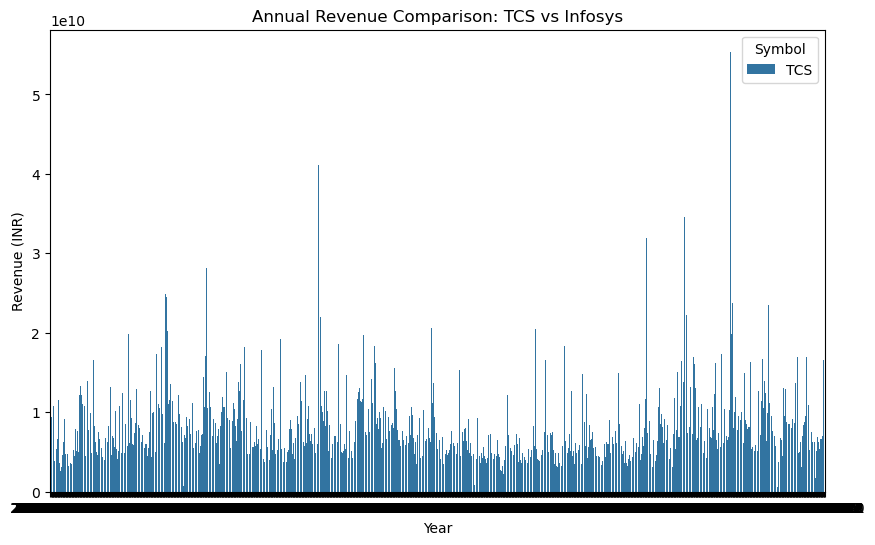

In [51]:
plt.figure(figsize=(10,6))
sb.barplot(data=TCS, x="Date", y="Revenue", hue="Symbol")
plt.xlabel("Year")
plt.ylabel("Revenue (INR)")
plt.title("Annual Revenue Comparison: TCS vs Infosys")
plt.show()